In [2]:
%matplotlib inline
import pandas as pd

In [2]:
df = pd.read_csv('./data/developer_survey_2019/survey_results_public.csv')

In [3]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [11]:
df['JobSat'].unique()

array([nan, 'Slightly satisfied', 'Slightly dissatisfied',
       'Neither satisfied nor dissatisfied', 'Very satisfied',
       'Very dissatisfied'], dtype=object)

In [30]:
hours_vs_sat = df[['WorkWeekHrs','JobSat']].dropna(how='any')
hours_vs_sat = hours_vs_sat[hours_vs_sat['WorkWeekHrs'] < 100]
hours_vs_sat.head()

,WorkWeekHrs,JobSat
2,40.0,Slightly satisfied
3,80.0,Slightly satisfied
4,55.0,Slightly dissatisfied
5,15.0,Slightly satisfied
6,32.0,Neither satisfied nor dissatisfied


In [31]:
hours_vs_sat['JobSat'].unique()

array(['Slightly satisfied', 'Slightly dissatisfied',
       'Neither satisfied nor dissatisfied', 'Very satisfied',
       'Very dissatisfied'], dtype=object)

In [32]:
sat_mapper_lut = {
    'Very dissatisfied' : 0,
    'Slightly dissatisfied' : 0.25,
    'Neither satisfied nor dissatisfied' : 0.5,
    'Slightly satisfied' : 0.75,
    'Very satisfied' : 1,
}

In [33]:
hours_vs_sat['JobSatNum'] = hours_vs_sat.apply(lambda row: sat_mapper_lut[row['JobSat']], axis=1)
hours_vs_sat.head()

,WorkWeekHrs,JobSat,JobSatNum
2,40.0,Slightly satisfied,0.75
3,80.0,Slightly satisfied,0.75
4,55.0,Slightly dissatisfied,0.25
5,15.0,Slightly satisfied,0.75
6,32.0,Neither satisfied nor dissatisfied,0.50


[]

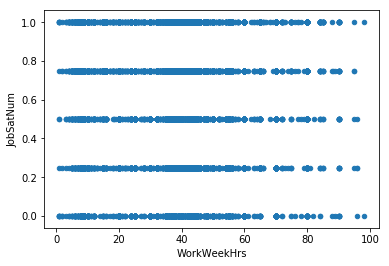

In [34]:
ax = hours_vs_sat.plot.scatter(x='WorkWeekHrs',y='JobSatNum')
ax.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AC759905F8>,
      dtype=object)

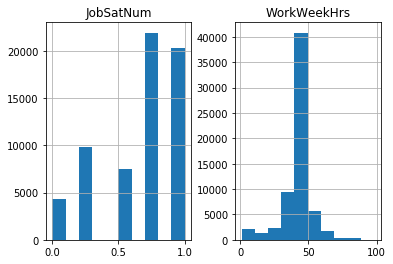

In [38]:
hours_vs_sat.hist()

In [36]:
hours_vs_sat.corr()

,WorkWeekHrs,JobSatNum
WorkWeekHrs,1.000000,0.003051
JobSatNum,0.003051,1.000000


In [37]:
# https://crawford.anu.edu.au/files/uploads/crawford01_cap_anu_edu_au/2016-02/working_paper_-_fabian_and_breunig_2016_overwork.pdf

In [64]:
hours_vs_type = df[['WorkWeekHrs','DevType']].dropna(how='any')
# hours_vs_type = hours_vs_type[hours_vs_type['WorkWeekHrs'] < 100]
hours_vs_type.head()

,WorkWeekHrs,DevType
2,40.0,"Designer;Developer, back-end;Developer, front-..."
3,80.0,"Developer, full-stack"
4,55.0,"Academic researcher;Developer, desktop or ente..."
5,15.0,Data or business analyst;Data scientist or mac...
6,32.0,"Designer;Developer, front-end"


In [65]:
grouped = hours_vs_type.groupby('DevType')
substantial = grouped.count()['WorkWeekHrs'] > 100
grouped.mean()[substantial].sort_values('WorkWeekHrs')

,WorkWeekHrs
DevType,
"Developer, full-stack;Student",34.168246
"Developer, back-end;Developer, front-end;Developer, full-stack;Student",35.127451
"Developer, back-end;Student",36.094767
"Developer, back-end;Developer, desktop or enterprise applications;Developer, embedded applications or devices;Developer, front-end;Developer, full-stack",39.031008
Data or business analyst;Data scientist or machine learning specialist,39.678756
"Database administrator;Developer, full-stack",39.829545
"Developer, back-end;Developer, desktop or enterprise applications;Developer, embedded applications or devices;Developer, front-end;Developer, full-stack;Developer, mobile",40.134615
"Developer, desktop or enterprise applications;Developer, embedded applications or devices",40.351744
"Developer, front-end",40.378088


In [42]:
len(hours_vs_type['DevType'].unique())

10414